Policy:
- "blue -t 10.0 -f 0.8 -i 0.05 -s 5.0 -e 30"
- Exploration for 30 steps @ 10s per step = 5 mins

Experiment:
- Run 200 RPS DOS attack (constant rate, not Shrew) from Mac after 90 seconds.

In [18]:

import plot_utils
from plot_utils import LogFile,LogFileType,Fig,Roller
import rolling_funcs

WINDOW_SECS=5.0

In [19]:

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
mean_roller = Roller('mean', rolling_funcs.mean)
packet_rate = Roller('rate', rolling_funcs.count_kleene_packets, rate=True)

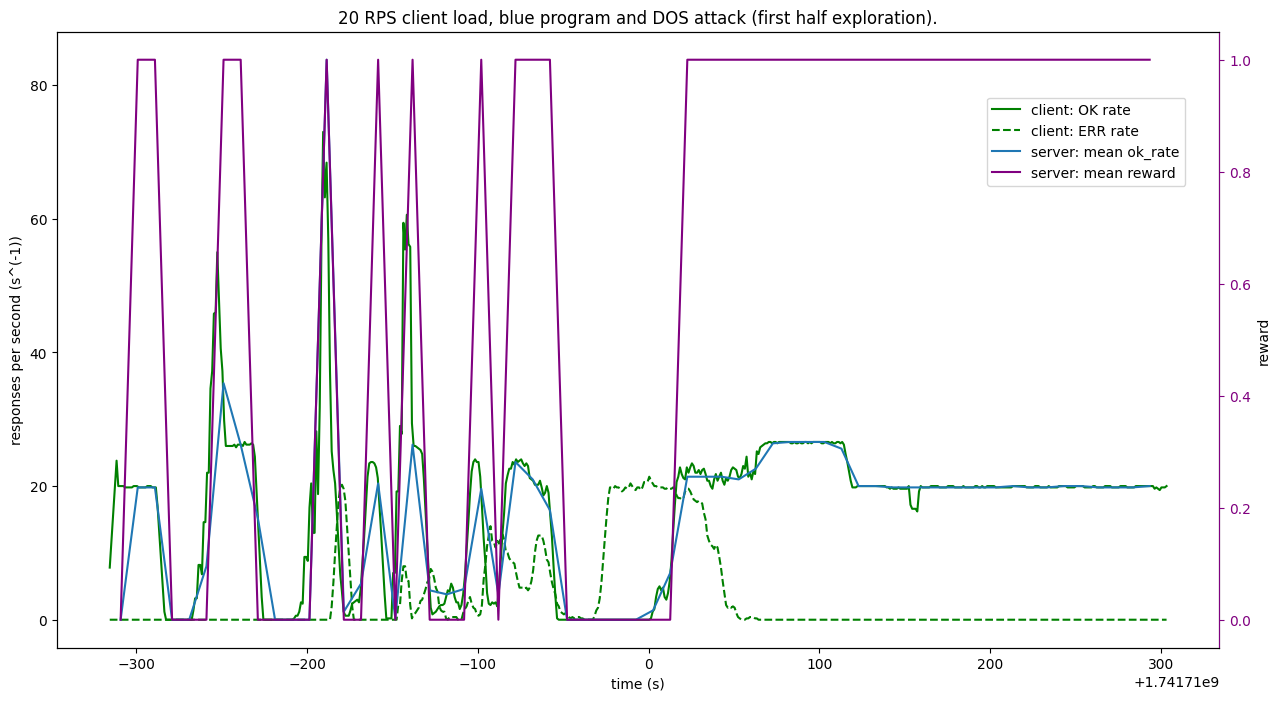

In [20]:
HILBERT="./logs/hilbert/2025-03-11_16:25:32.json"
HILBERT_BLUE="./logs/hilbert/2025-03-11_16-14-50.775960.txt"
KLEENE="./logs/kleene/2025-03-11_16-14-43.397182.txt"
KLEENE_TELEGRAF="./logs/kleene/2025-03-11_16:25:32.json"
MAC="./logs/mac/.txt"

fig,ax = plot_utils.fig([Fig(title='20 RPS client load, blue program and DOS attack (first half exploration).',x='time (s)',y='responses per second (s^(-1))')])

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})
# shrew_log = LogFile(log_type=LogFileType.GOT, path=MAC,kwargs={'color':'r'})

blue_reward = LogFile(log_type=LogFileType.BLUE, path=HILBERT_BLUE,
kwargs={'states': [{'reward':{'color':'purple'}}]})

blue_ok_rate = LogFile(log_type=LogFileType.BLUE, path=HILBERT_BLUE,
kwargs={'states': ['ok_rate']})

# blue_actions = LogFile(log_type=LogFileType.BLUE, path=HILBERT_BLUE,
# kwargs={'actions': True
# })

ax_reward, = plot_utils.add_y_axes(
    ax, [('reward','purple'),]
)

# plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_reward, {'server': blue_reward}, [mean_roller],WINDOW_SECS,times_units='s')
# plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=1.0, times_units='s')
plot_utils.overlay_rolling(ax, {'server': blue_ok_rate}, [mean_roller],WINDOW_SECS,times_units='s')

plot_utils.show_combined_legends([ax,ax_reward], loc=[0.8,0.75])
fig.savefig('./plots/20RPS_DOS_missing_attack_rps.png')

In [21]:
from blue import Blue
Blue(HILBERT_BLUE).stats(sorted=True)

[('red_blocked', 5),
 ('none_blocked', 3),
 ('both_blocked', 2),
 ('green_blocked', 1)]

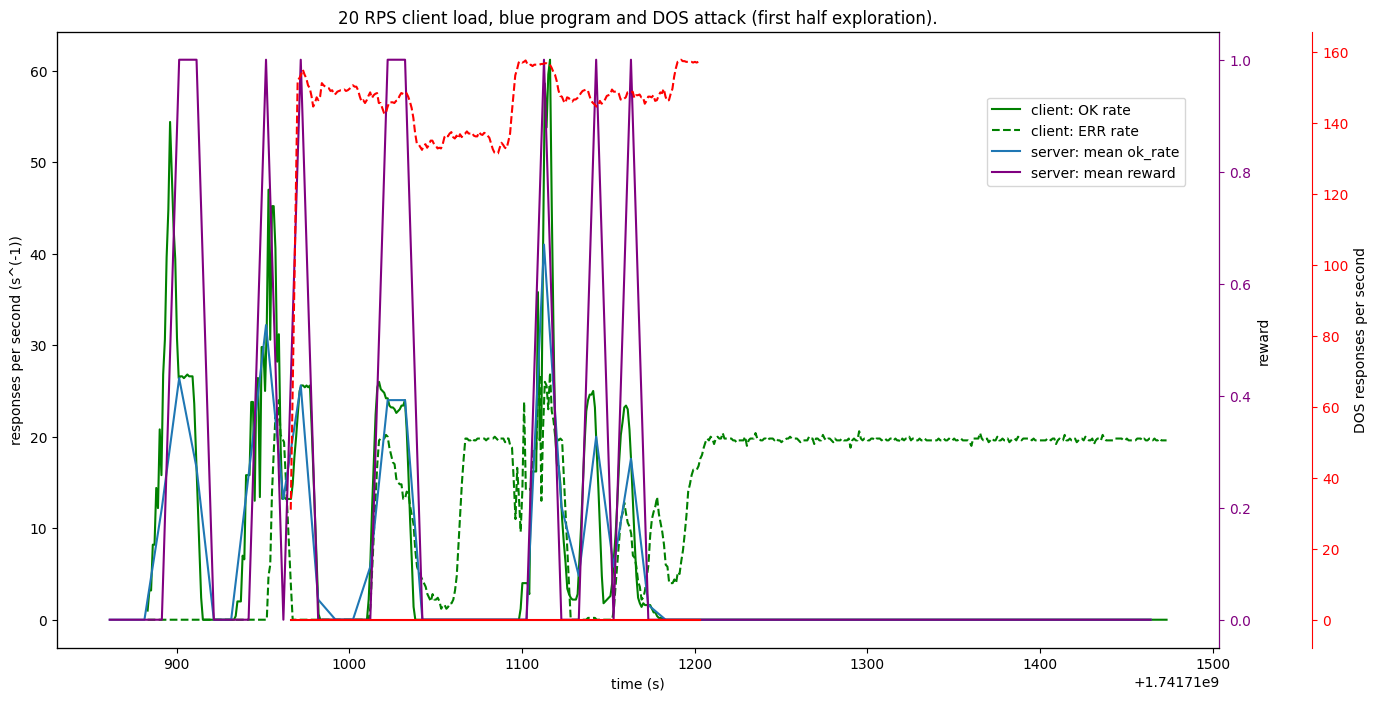

In [22]:

HILBERT="./logs/hilbert/2025-03-11_16:44:50.json"
HILBERT_BLUE="./logs/hilbert/2025-03-11_16-34-21.261315.txt"
KLEENE="./logs/kleene/2025-03-11_16-34-42.193464.txt"
KLEENE_TELEGRAF="./logs/kleene/2025-03-11_16:44:50.json"
MAC="./logs/mac/2025-03-11_16-36-05.060560.txt"

fig,ax = plot_utils.fig([Fig(title='20 RPS client load, blue program and DOS attack (first half exploration).',x='time (s)',y='responses per second (s^(-1))')])

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})
shrew_log = LogFile(log_type=LogFileType.GOT, path=MAC,kwargs={'color':'r'})

blue_reward = LogFile(log_type=LogFileType.BLUE, path=HILBERT_BLUE,
kwargs={'states': [{'reward':{'color':'purple'}}]})

blue_ok_rate = LogFile(log_type=LogFileType.BLUE, path=HILBERT_BLUE,
kwargs={'states': ['ok_rate']})

# blue_actions = LogFile(log_type=LogFileType.BLUE, path=HILBERT_BLUE,
# kwargs={'actions': True
# })

ax_reward, ax_shrew = plot_utils.add_y_axes(
    ax, [('reward','purple'),('DOS responses per second','red')]
)

# plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_reward, {'server': blue_reward}, [mean_roller],WINDOW_SECS,times_units='s')
# plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=1.0, times_units='s')
plot_utils.overlay_rolling(ax, {'server': blue_ok_rate}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_shrew, {'DOS attack': shrew_log}, response_rollers, WINDOW_SECS, const_stride_secs=1.0, times_units='s')

plot_utils.show_combined_legends([ax,ax_reward], loc=[0.8,0.75])
fig.savefig('./plots/20RPS_DOS.png')

In [23]:
from blue import Blue
Blue(HILBERT_BLUE).stats(sorted=True)

[('both_blocked', 3),
 ('none_blocked', 2),
 ('red_blocked', 2),
 ('green_blocked', 1)]